# EKSTRAKSI PALET WARNA UNTUK KOMPRESI GAMBAR DIGITAL MENGGUNAKAN ALGORITMA K-MEANS

TUGAS AKHIR

Ahmad Ma'ruf  
NIM. 2020150012

Teknik Informatika  
Fakultas Teknik dan Ilmu Komputer  
Universitas Sains Al-Qur'an Jawa Tengah di Wonosobo  
2024

### Dataset Gambar
https://drive.google.com/drive/folders/13cc9m-1gNY--0HOwyTi2XadrwHo5KsvH?usp=sharing

### Result Percobaan
https://drive.google.com/file/d/1N6sQjcZ6zA2izJsRjXIS24cckAmcHlWR/view?usp=sharing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# @title Source File
data_source = "result-240630_11-27.csv" # @param {type:"string"}

In [ ]:
dataset_df = pd.read_csv(data_source)
dataset_df.head()

,id,img_type,k,mse,psnr,original_size,compressed_size,cr,comp_time
0,a1_8_1,a,8,224.121668,24.625965,85850,45203,0.47,0.27
1,a1_8_2,a,8,224.108663,24.626217,85850,45204,0.47,0.25
2,a1_8_3,a,8,224.303738,24.622439,85850,45205,0.47,0.23
3,a1_16_1,a,16,98.499870,28.196447,85850,46043,0.46,0.34
4,a1_16_2,a,16,96.269513,28.295916,85850,46070,0.46,0.26


In [ ]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               216 non-null    object 
 1   img_type         216 non-null    object 
 2   k                216 non-null    int64  
 3   mse              216 non-null    float64
 4   psnr             216 non-null    float64
 5   original_size    216 non-null    int64  
 6   compressed_size  216 non-null    int64  
 7   cr               216 non-null    float64
 8   comp_time        216 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 15.3+ KB


- Dari ouput kode diatas dapat ditemukan bahwa jumlah data ada sebanyak 216, sesuai dengan jumlah percobaan yang dilakukan
- tidak ada data null/data yang tidak lengkap dataset tersebut

In [ ]:
dataset_df.describe()

,k,mse,psnr,original_size,compressed_size,cr,comp_time
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,57.333333,63.747680,33.477876,188698.833333,60305.689815,0.668426,2.598148
std,43.531544,95.411404,6.064009,104417.311178,32774.211494,0.076373,2.982005
min,8.000000,0.227587,19.884930,41631.000000,14566.000000,0.460000,0.190000
25%,16.000000,13.621112,29.724648,85117.750000,34289.250000,0.657500,0.622500
50%,48.000000,28.471196,33.586746,201940.500000,53059.500000,0.690000,1.290000
75%,96.000000,69.289014,36.789358,253604.750000,85009.000000,0.720000,3.120000
max,128.000000,667.709213,54.559320,376351.000000,119333.000000,0.750000,15.030000


In [ ]:
# prompt: buatkan saya visualisasi untuk dataset_df untuk mengetahui kaitan antar variabelnya dengan scatterplot

# sns.pairplot(dataset_df)
# plt.show()


In [ ]:
# @title Mengukur Sebaran Data (Data Dispersion)
# Range
def countRange(dataset: pd.DataFrame, column: str):
  return dataset[column].max() - dataset[column].min();

range_mse =  countRange(dataset=dataset_df, column='mse');
range_psnr =  countRange(dataset=dataset_df, column='psnr');
range_cr =  countRange(dataset=dataset_df, column='cr');
range_comp_time =  countRange(
    dataset=dataset_df, column='comp_time');

print(f"Range MSE: {range_mse:.6f}");
print(f"Range PSNR: {range_psnr:.3f}");
print(f"Range Compression Ratio: {range_cr:.3f}");
print(f"Range Computation Time: {range_comp_time:.3f}");

# IQR (Intequartile Range)
def countIQR(dataset: pd.DataFrame, column: str):
  return dataset[
      column].quantile(0.75) - dataset[column].quantile(0.25)

iqr_mse = countIQR(dataset=dataset_df, column='mse');
iqr_psnr = countIQR(dataset=dataset_df, column='psnr');
iqr_cr = countIQR(dataset=dataset_df, column='cr');
iqr_comp_time = countIQR(dataset=dataset_df, column='comp_time');

print("-----------------------")
print(f"IQR MSE {iqr_mse:.6f}")
print(f"IQR PSNR {iqr_psnr:.3f}")
print(f"IQR Compression Ratio {iqr_cr:.3f}")
print(f"IQR Computation Time {iqr_comp_time:.3f}")

# For Standar Deviation you can see from .describe() method above
# Variance
var_mse = dataset_df['mse'].var()
var_psnr = dataset_df['psnr'].var()
var_cr = dataset_df['cr'].var()
var_comp_time = dataset_df['comp_time'].var()

print("-----------------------")
print(f'Variance MSE {var_mse:.6f}')
print(f'Variance PSNR {var_psnr:.3f}')
print(f'Variance CR {var_cr:.3f}')
print(f'Variance Comp time {var_comp_time:.3f}')


Range MSE: 667.481625
Range PSNR: 34.674
Range Compression Ratio: 0.290
Range Computation Time: 14.840
-----------------------
IQR MSE 55.667902
IQR PSNR 7.065
IQR Compression Ratio 0.062
IQR Computation Time 2.498
-----------------------
Variance MSE 9103.335933
Variance PSNR 36.772
Variance CR 0.006
Variance Comp time 8.892


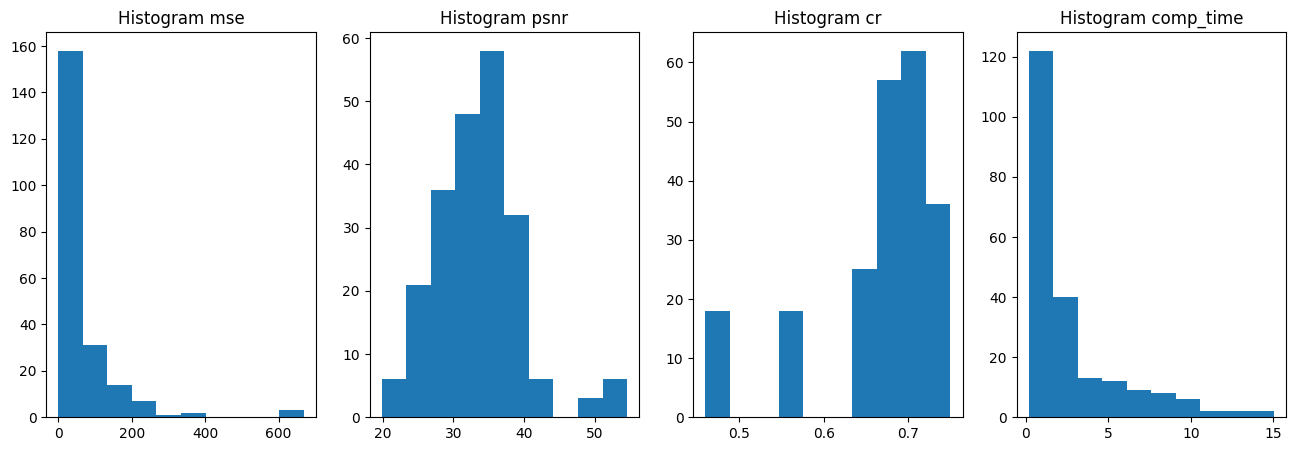

In [ ]:
# @title Mengukur asymetric data
# HISTOGRAM
col = ['mse', 'psnr', 'cr', 'comp_time']
fig = plt.figure(figsize=(16,5))
fig.subplots_adjust(hspace=0.4, wspace=0.2)

for index,item in enumerate(col):
  plt.subplot(1,4, index+1)
  plt.hist(dataset_df[item])
  plt.title(f"Histogram {item}")

plt.show()

In [ ]:
# Skewness
skew_mse = dataset_df['mse'].skew()
skew_psnr = dataset_df['psnr'].skew()
skew_cr = dataset_df['cr'].skew()
skew_comp_time = dataset_df['comp_time'].skew()

print(f'Skew MSE: {var_mse:.6f}')
print(f'Skew PSNR: {var_psnr:.3f}')
print(f'Skew CR: {var_cr:.3f}')
print(f'Skew Comp time: {var_comp_time:.3f}')

Skew MSE: 9103.335933
Skew PSNR: 36.772
Skew CR: 0.006
Skew Comp time: 8.892


In [ ]:
# @title Keterkaitan antar data - Correlation

dataset_df.corr(numeric_only=True)

,k,mse,psnr,original_size,compressed_size,cr,comp_time
k,1.000000e+00,-0.483575,0.645621,3.526037e-17,-0.005064,0.013281,0.622903
mse,-4.835754e-01,1.000000,-0.698242,4.064510e-02,0.006775,0.082853,-0.318808
psnr,6.456206e-01,-0.698242,1.000000,-2.351583e-01,-0.235828,0.059150,0.291948
original_size,3.526037e-17,0.040645,-0.235158,1.000000e+00,0.936796,0.287345,0.504094
compressed_size,-5.063621e-03,0.006775,-0.235828,9.367956e-01,1.000000,-0.026488,0.552439
cr,1.328114e-02,0.082853,0.059150,2.873446e-01,-0.026488,1.000000,0.005154
comp_time,6.229025e-01,-0.318808,0.291948,5.040940e-01,0.552439,0.005154,1.000000


In [ ]:
# @title Keterkaitan antar data - Covariance

dataset_df.cov(numeric_only=True)

,k,mse,psnr,original_size,compressed_size,cr,comp_time
k,1.894995e+03,-2008.484780,170.428143,-6.585538e-13,-7.224329e+03,0.044155,80.859783
mse,-2.008485e+03,9103.335933,-403.985608,4.049310e+05,2.118566e+04,0.603738,-90.706450
psnr,1.704281e+02,-403.985608,36.772205,-1.488993e+05,-4.686916e+04,0.027394,5.279261
original_size,-6.585538e-13,404930.974726,-148899.301962,1.090297e+10,3.205897e+09,2291.481550,156961.254109
compressed_size,-7.224329e+03,21185.659993,-46869.163106,3.205897e+09,1.074149e+09,-66.300118,53991.471330
cr,4.415504e-02,0.603738,0.027394,2.291482e+03,-6.630012e+01,0.005833,0.001174
comp_time,8.085978e+01,-90.706450,5.279261,1.569613e+05,5.399147e+04,0.001174,8.892355


In [ ]:
# @title Data Assesment
# tidak ada null value
# tidak ada duplikat data

# menghapus outlier
# sudah hitung IQR di cell sebelumnya, sekarang tinggal hitung cut_off yaitu iqr*1.5


# def countMinMax(dataset: pd.DataFrame, column: str):
#   q1 = dataset[column].quantile(0.25)
#   q3 = dataset[column].quantile(0.75)
#   iqr = q3 - q1
#   cut_off = iqr * 1.5
#   return q1 - cut_off, q3 + cut_off

# min_mse, max_mse = countMinMax(dataset=dataset_df, column='mse')
# min_psnr, max_psnr = countMinMax(dataset=dataset_df, column='psnr')
# min_cr, max_cr = countMinMax(dataset=dataset_df, column='cr')
# min_comp_time, max_comp_time = countMinMax(dataset=dataset_df, column='cr')


# # UBAH DATA OUTLIER dengan imputation
# lower_mse_state = dataset_df['mse'] < min_mse
# higher_mse_state = dataset_df['mse'] > max_mse

# lower_psnr_state = dataset_df['psnr'] < min_psnr
# higher_psnr_state = dataset_df['psnr'] > max_psnr

# lower_cr_state = dataset_df['cr'] < min_cr
# higher_cr_state = dataset_df['cr'] > max_cr

# lower_comp_time_state = dataset_df['comp_time'] < min_comp_time
# higher_comp_time_state = dataset_df['comp_time'] > max_comp_time

# dataset_df['mse'].mask(cond=lower_mse_state, other=min_mse, axis=0, inplace=True)
# dataset_df['mse'].mask(cond=higher_mse_state, other=max_mse, axis=0, inplace=True)

# dataset_df['psnr'].mask(cond=lower_psnr_state, other=min_psnr, axis=0, inplace=True)
# dataset_df['psnr'].mask(cond=higher_psnr_state, other=max_psnr, axis=0, inplace=True)

# dataset_df['cr'].mask(cond=lower_cr_state, other=min_cr, axis=0, inplace=True)
# dataset_df['cr'].mask(cond=higher_cr_state, other=max_cr, axis=0, inplace=True)


# dataset_df['comp_time'].mask(cond=lower_comp_time_state, other=min_comp_time, axis=0, inplace=True)
# dataset_df['comp_time'].mask(cond=higher_comp_time_state, other=max_comp_time, axis=0, inplace=True)


# dataset_df.describe()


In [ ]:
# dataset_df.hist()

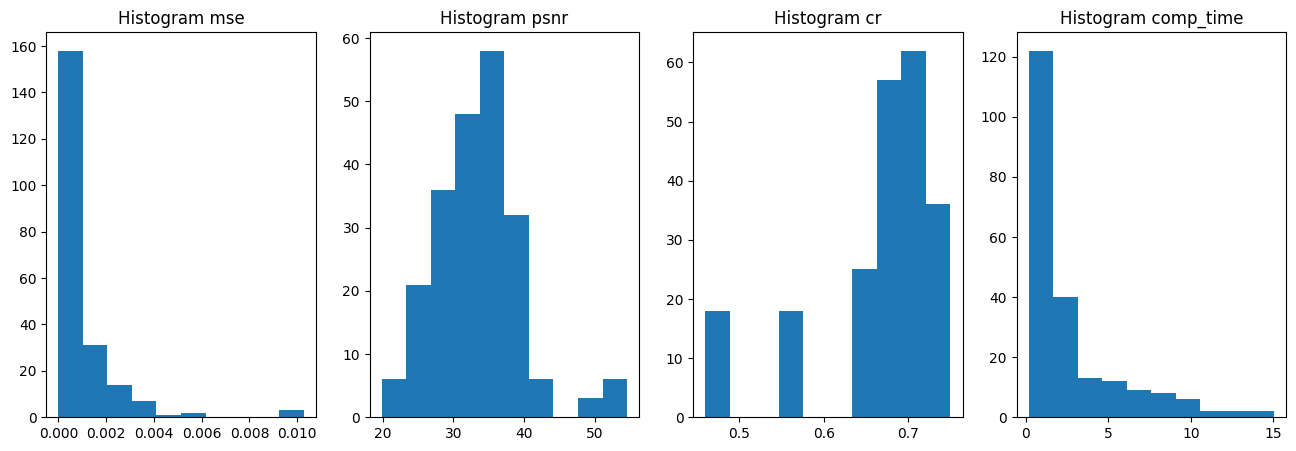

In [ ]:
# @title Histogram setelah outliers dihilangkan

col = ['mse', 'psnr', 'cr', 'comp_time']
fig = plt.figure(figsize=(16,5))
fig.subplots_adjust(hspace=0.4, wspace=0.2)

for index,item in enumerate(col):
  plt.subplot(1,4, index+1)
  plt.hist(dataset_df[item])
  plt.title(f"Histogram {item}")

plt.show()

# Exploratory Data Analysis

In [ ]:
# melihat kembali korelasi antar features
dataset_df.corr(numeric_only=True)

,k,mse,psnr,original_size,compressed_size,cr,comp_time
k,1.000000e+00,-0.483575,0.645621,3.526037e-17,-0.005064,0.013281,0.622903
mse,-4.835754e-01,1.000000,-0.698242,4.064510e-02,0.006775,0.082853,-0.318808
psnr,6.456206e-01,-0.698242,1.000000,-2.351583e-01,-0.235828,0.059150,0.291948
original_size,3.526037e-17,0.040645,-0.235158,1.000000e+00,0.936796,0.287345,0.504094
compressed_size,-5.063621e-03,0.006775,-0.235828,9.367956e-01,1.000000,-0.026488,0.552439
cr,1.328114e-02,0.082853,0.059150,2.873446e-01,-0.026488,1.000000,0.005154
comp_time,6.229025e-01,-0.318808,0.291948,5.040940e-01,0.552439,0.005154,1.000000


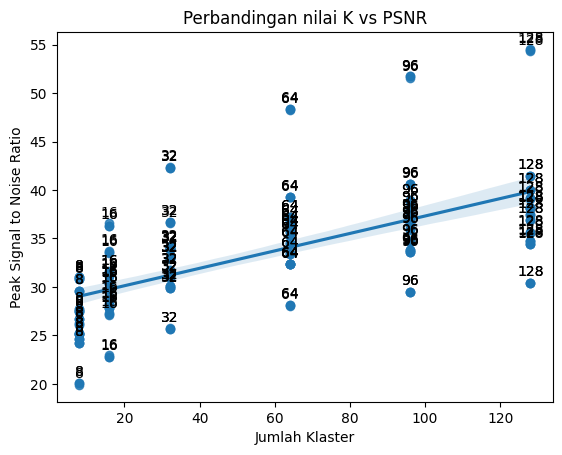

In [ ]:

xs = dataset_df['k']
ys = dataset_df['psnr']
sns.regplot(x=xs, y=ys)
for x, y in zip(xs, ys):
      plt.annotate(f'{x}', (x, y), textcoords="offset points", xytext=(0, 5), ha='center')
plt.title("Perbandingan nilai K vs PSNR")
plt.xlabel("Jumlah Klaster")
plt.ylabel("Peak Signal to Noise Ratio")
plt.show()


In [ ]:
# @title Kelompokkan data by K
grouped_df = dataset_df.groupby('k').agg({
    'mse': 'mean',
    'psnr': 'mean',
    'cr': 'mean',
    'comp_time': 'mean',
}).reset_index()

grouped_df.head()

,k,mse,psnr,cr,comp_time
0,8,184.773776,26.549142,0.670278,0.502778
1,16,89.746241,29.857494,0.665278,0.814722
2,32,46.846358,32.943362,0.666389,1.454167
3,64,26.358787,35.778814,0.668611,3.034444
4,96,19.234034,37.326300,0.670000,4.166111


In [ ]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   k          6 non-null      int64  
 1   mse        6 non-null      float64
 2   psnr       6 non-null      float64
 3   cr         6 non-null      float64
 4   comp_time  6 non-null      float64
dtypes: float64(4), int64(1)
memory usage: 368.0 bytes


In [ ]:
grouped_df.describe()

,k,mse,psnr,cr,comp_time
count,6.000000,6.000000,6.000000,6.000000,6.000000
mean,57.333333,63.747680,33.477876,0.668426,2.598148
std,47.575904,65.289409,4.601129,0.002120,2.031758
min,8.000000,15.526886,26.549142,0.665278,0.502778
25%,20.000000,21.015222,30.628961,0.666944,0.974583
50%,48.000000,36.602573,34.361088,0.669306,2.244306
75%,88.000000,79.021270,36.939429,0.670000,3.883194
max,128.000000,184.773776,38.412146,0.670278,5.616667


In [ ]:
# @title Mengukur Sebaran Data (Data Dispersion)
# Range
def countRange(dataset: pd.DataFrame, column: str):
  return dataset[column].max() - dataset[column].min();

range_mse =  countRange(dataset=grouped_df, column='mse');
range_psnr =  countRange(dataset=grouped_df, column='psnr');
range_cr =  countRange(dataset=grouped_df, column='cr');
range_comp_time =  countRange(
    dataset=grouped_df, column='comp_time');

print(f"Range MSE: {range_mse:.6f}");
print(f"Range PSNR: {range_psnr:.3f}");
print(f"Range Compression Ratio: {range_cr:.3f}");
print(f"Range Computation Time: {range_comp_time:.3f}");

# IQR (Intequartile Range)
def countIQR(dataset: pd.DataFrame, column: str):
  return dataset[
      column].quantile(0.75) - dataset[column].quantile(0.25)

iqr_mse = countIQR(dataset=grouped_df, column='mse');
iqr_psnr = countIQR(dataset=grouped_df, column='psnr');
iqr_cr = countIQR(dataset=grouped_df, column='cr');
iqr_comp_time = countIQR(dataset=grouped_df, column='comp_time');

print("-----------------------")
print(f"IQR MSE {iqr_mse:.6f}")
print(f"IQR PSNR {iqr_psnr:.3f}")
print(f"IQR Compression Ratio {iqr_cr:.3f}")
print(f"IQR Computation Time {iqr_comp_time:.3f}")

# For Standar Deviation you can see from .describe() method above
# Variance
var_mse = grouped_df['mse'].var()
var_psnr = grouped_df['psnr'].var()
var_cr = grouped_df['cr'].var()
var_comp_time = grouped_df['comp_time'].var()

print("-----------------------")
print(f'Variance MSE {var_mse:.6f}')
print(f'Variance PSNR {var_psnr:.3f}')
print(f'Variance CR {var_cr:.3f}')
print(f'Variance Comp time {var_comp_time:.3f}')

Range MSE: 169.246889
Range PSNR: 11.863
Range Compression Ratio: 0.005
Range Computation Time: 5.114
-----------------------
IQR MSE 58.006048
IQR PSNR 6.310
IQR Compression Ratio 0.003
IQR Computation Time 2.909
-----------------------
Variance MSE 4262.706928
Variance PSNR 21.170
Variance CR 0.000
Variance Comp time 4.128


In [ ]:
grouped_df.corr()

,k,mse,psnr,cr,comp_time
k,1.000000,-0.772333,0.929942,0.522819,0.999170
mse,-0.772333,1.000000,-0.944671,0.034397,-0.772380
psnr,0.929942,-0.944671,1.000000,0.285077,0.931042
cr,0.522819,0.034397,0.285077,1.000000,0.527607
comp_time,0.999170,-0.772380,0.931042,0.527607,1.000000


# Visualisasi

In [ ]:

def visCompare(dataset: pd.DataFrame, col_x: str, col_y: str):
  xs = grouped_df[col_x]
  ys = grouped_df[col_y]
  sns.regplot(x=xs, y=ys)
  for x, y in zip(xs, ys):
      plt.annotate(f'{x}', (x, y), textcoords="offset points", xytext=(0, 5), ha='center')
  plt.title(f"Perbandingan nilai {col_x} vs {col_y}")
  plt.xlabel(col_x)
  plt.ylabel(col_y)
  plt.show()

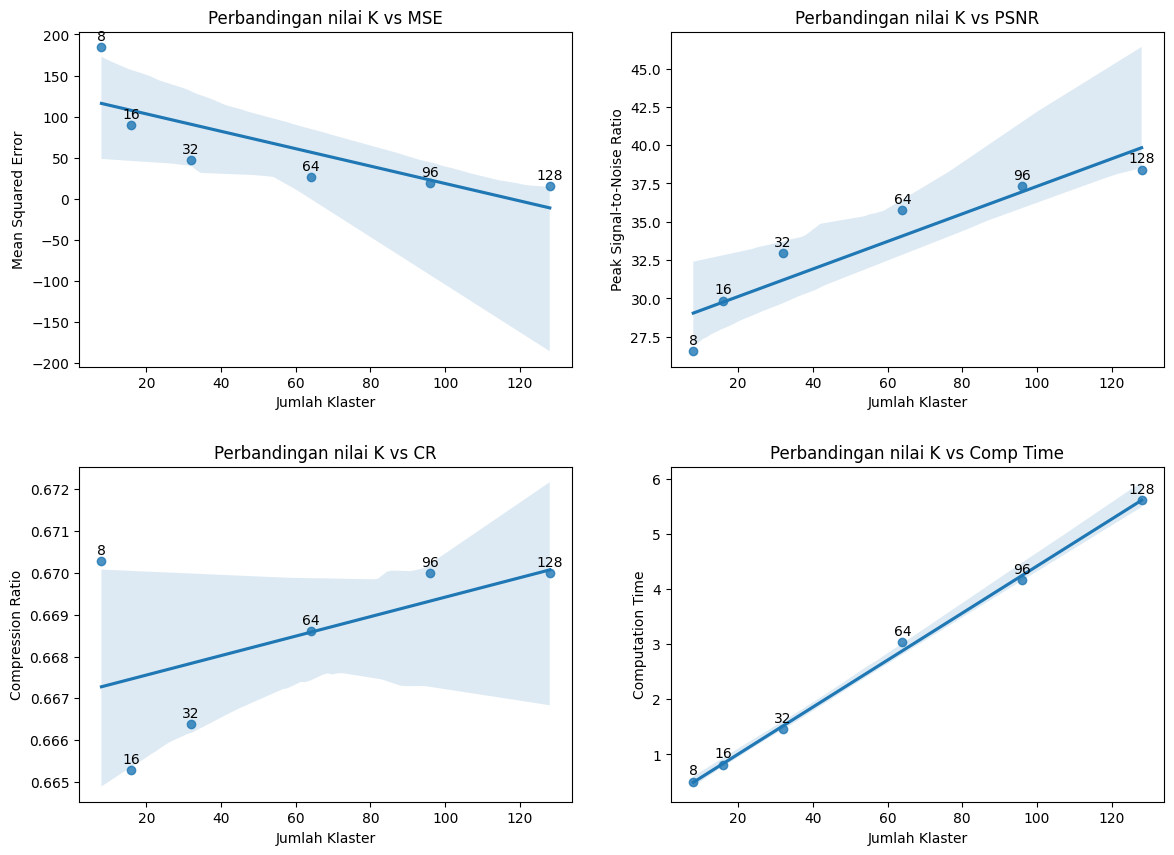

In [ ]:
plots = [
    ('k', 'mse', 'Perbandingan nilai K vs MSE', 'Jumlah Klaster', 'Mean Squared Error'),
    ('k', 'psnr', 'Perbandingan nilai K vs PSNR', 'Jumlah Klaster', 'Peak Signal-to-Noise Ratio'),
    ('k', 'cr', 'Perbandingan nilai K vs CR', 'Jumlah Klaster', 'Compression Ratio'),
    ('k', 'comp_time', 'Perbandingan nilai K vs Comp Time', 'Jumlah Klaster', 'Computation Time')
]

# Membuat figure dan axes untuk grid 2x2
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Mengatur jarak antar sub-plot
fig.subplots_adjust(hspace=0.3, wspace=0.2)

# Membuat setiap sub-plot
for ax, (x_col, y_col, title, xlabel, ylabel) in zip(axs.ravel(), plots):
    sns.regplot(x=grouped_df[x_col], y=grouped_df[y_col], ax=ax)
    for x, y in zip(grouped_df[x_col], grouped_df[y_col]):
        ax.annotate(f'{x}', (x, y), textcoords="offset points", xytext=(0, 5), ha='center')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

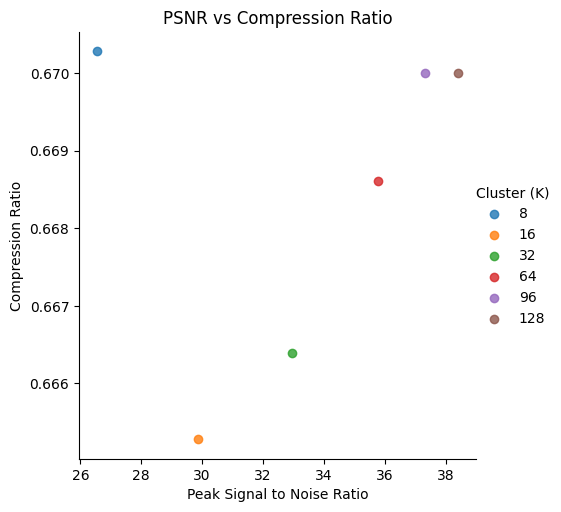

In [ ]:
g = sns.lmplot(data=grouped_df, x='psnr', y='cr', hue="k")
plt.title("PSNR vs Compression Ratio")
plt.xlabel("Peak Signal to Noise Ratio")
plt.ylabel("Compression Ratio")
g._legend.set_title("Cluster (K)")
plt.show()

# finding
# klaster 96 & 128 menghasilkan nilai PSNR dan rasio kompresi tertinggi

In [ ]:
# FIND the best K
# Calculate the mean values for each metric
mean_cr = grouped_df['cr'].mean()
mean_mse = grouped_df['mse'].mean()
mean_psnr = grouped_df['psnr'].mean()
mean_time = grouped_df['comp_time'].mean()

# Filter the DataFrame based on the conditions
filtered_df = grouped_df.loc[
    (grouped_df['cr'] >= 0.67) &
    (grouped_df['mse'] <= mean_mse) &
    (grouped_df['psnr'] >= 30.0)
]

if not filtered_df.empty:
    fil_df = filtered_df.loc[
        filtered_df['cr'] == filtered_df['cr'].max()]

    optimal_df = fil_df.iloc[0]
    print("Optimal df")
    print(optimal_df)
    print("-------------------")
    print(f"Optimal value of K: {optimal_df['k']}")
else:
    print("No K value found that satisfies the criteria")

Optimal df
k            96.000000
mse          19.234034
psnr         37.326300
cr            0.670000
comp_time     4.166111
Name: 4, dtype: float64
-------------------
Optimal value of K: 96.0
